# CDAT Migration Regression Testing Notebook (`.png` files)

This notebook is used to perform regression testing between the development and
production versions of a diagnostic set.

## How to use

PREREQUISITE: The diagnostic set's netCDF stored in `.json` files in two directories
(dev and `main` branches).

1. Make a copy of this notebook under `auxiliary_tools/cdat_regression_testing/<DIR_NAME>`.
2. Run `mamba create -n cdat_regression_test -y -c conda-forge "python<3.12" xarray netcdf4 dask pandas matplotlib-base ipykernel`
3. Run `mamba activate cdat_regression_test`
4. Update `SET_DIR` and `SET_NAME` in the copy of your notebook.
5. Run all cells IN ORDER.


## Setup Code


In [1]:
import glob

from auxiliary_tools.cdat_regression_testing.utils import get_image_diffs

SET_NAME = "polar"
SET_DIR = "25-08-27-branch-945-xesmf-bnds"

DEV_PATH = f"/lcrc/group/e3sm/public_html/cdat-migration-fy24/{SET_DIR}/{SET_NAME}/**"
DEV_GLOB = sorted(glob.glob(DEV_PATH + "/*.png"))
DEV_NUM_FILES = len(DEV_GLOB)

MAIN_PATH = f"/lcrc/group/e3sm/public_html/cdat-migration-fy24/25-02-14-branch-930-polar-main/{SET_NAME}/**"
MAIN_GLOB = sorted(glob.glob(MAIN_PATH + "/*.png"))
MAIN_NUM_FILES = len(MAIN_GLOB)

In [2]:
def _check_if_files_found():
    if DEV_NUM_FILES == 0 or MAIN_NUM_FILES == 0:
        raise IOError(
            "No files found at DEV_PATH and/or MAIN_PATH. "
            f"Please check {DEV_PATH} and {MAIN_PATH}."
        )


def _check_if_matching_filecount():
    if DEV_NUM_FILES != MAIN_NUM_FILES:
        raise IOError(
            "Number of files do not match at DEV_PATH and MAIN_PATH "
            f"({DEV_NUM_FILES} vs. {MAIN_NUM_FILES})."
        )

    print(f"Matching file count ({DEV_NUM_FILES} and {MAIN_NUM_FILES}).")


def _check_if_missing_files():
    missing_count = 0

    for fp_main in MAIN_GLOB:
        fp_dev = fp_main.replace(SET_DIR, "main-diurnal-cycle")

        if fp_dev not in MAIN_GLOB:
            print(f"No production file found to compare with {fp_dev}!")
            missing_count += 1

    for fp_dev in DEV_GLOB:
        fp_main = fp_main.replace("main-diurnal-cycle", SET_DIR)

        if fp_main not in DEV_GLOB:
            print(f"No development file found to compare with {fp_main}!")
            missing_count += 1

    print(f"Number of files missing: {missing_count}")

## 1. Check for matching and equal number of files


In [3]:
_check_if_files_found()

In [4]:
_check_if_missing_files()

No development file found to compare with /lcrc/group/e3sm/public_html/cdat-migration-fy24/25-02-14-branch-930-polar-main/polar/GPCP_v3.2/GPCP_v3.2-PRECT-ANN-polar_N.png!
Number of files missing: 1


In [5]:
_check_if_matching_filecount()

Matching file count (1 and 1).


## 2 Compare the plots between branches

- Compare "ref" and "test" files
- "diff" files are ignored because getting relative diffs for these does not make sense (relative diff will be above tolerance)


Comparing:
    * /lcrc/group/e3sm/public_html/cdat-migration-fy24/25-02-14-branch-930-polar-main/polar/GPCP_v3.2/GPCP_v3.2-PRECT-ANN-polar_N.png
    * /lcrc/group/e3sm/public_html/cdat-migration-fy24/25-08-27-branch-945-xesmf-bnds/polar/GPCP_v3.2/GPCP_v3.2-PRECT-ANN-polar_N.png


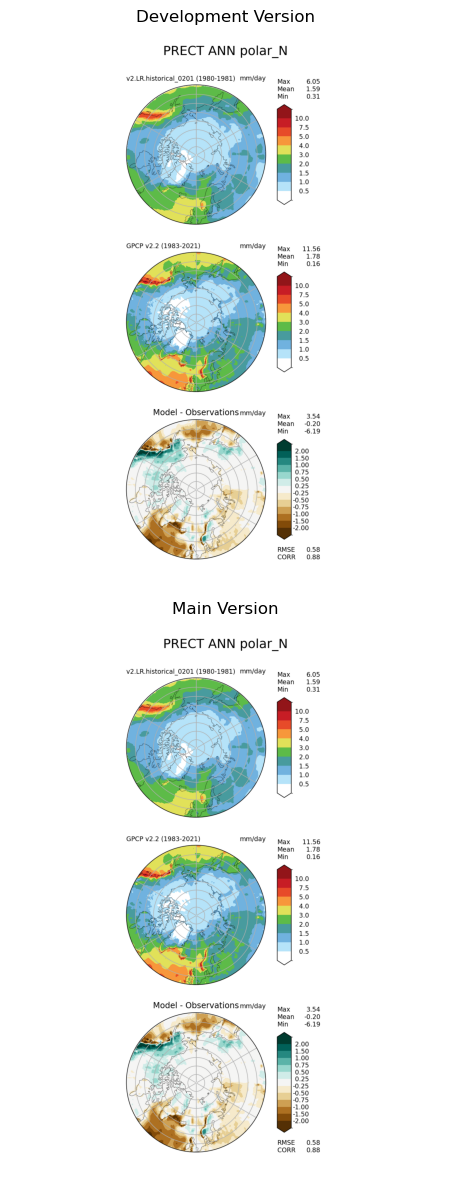

     * Plots are identical


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dev_path = DEV_GLOB[0]
main_path = MAIN_GLOB[0]

print("Comparing:")
print(f"    * {main_path}")
print(f"    * {dev_path}")

# Load images
dev_img = mpimg.imread(dev_path)
main_img = mpimg.imread(main_path)

# Display images stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

axes[0].imshow(dev_img)
axes[0].set_title("Development Version")
axes[0].axis("off")

axes[1].imshow(main_img)
axes[1].set_title("Main Version")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# Get the diffs
get_image_diffs(dev_path, main_path)

### Results

All plots are identical
